In [6]:
#交叉验证_1
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris=load_iris()
x=iris.data
y=iris.target

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))

0.9736842105263158


In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

iris=load_iris()
x=iris.data
y=iris.target

knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())



[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


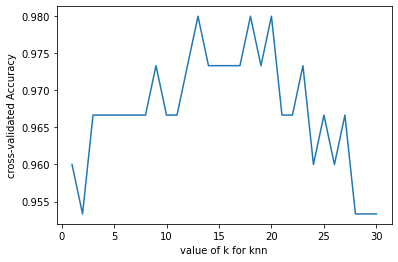

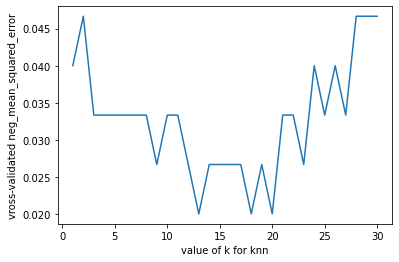

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import numpy as np 

iris=load_iris()
x=iris.data
y=iris.target

k_scores=[]
k_loss=[]
k_range=np.arange(1,31)

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')#for classfication
    loss=-cross_val_score(knn,x,y,cv=10,scoring='neg_mean_squared_error')#for regression
    k_scores.append(score.mean())
    k_loss.append(loss.mean())
    
plt.figure(1)
plt.xlabel("value of k for knn")
plt.ylabel("cross-validated Accuracy")    
plt.plot(k_range,k_scores)

plt.figure(2)
plt.xlabel("value of k for knn")
plt.ylabel("vross-validated neg_mean_squared_error")
plt.plot(k_range,k_loss)
plt.show()


d:\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 4 instead of 5).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


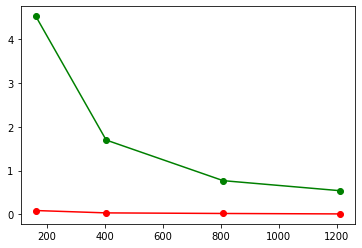

In [6]:
#交叉验证_2

#learning_curve是用来看数据量变化的
#validation_curve是用来看参数的变化的（调参）

from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits=load_digits()
x=digits.data
y=digits.target

train_sizes,train_loss,test_loss=learning_curve(SVC(gamma=0.001),x,y,cv=10,scoring='neg_mean_squared_error',train_sizes=[0.1,0.25,0.5,0.75,0.1])
train_loss_mean=-np.mean(train_loss,axis=1)
test_loss_mean=-np.mean(test_loss,axis=1)

plt.plot(train_sizes,train_loss_mean,'o-',color="r",label="Training")
plt.plot(train_sizes,test_loss_mean,'o-',color="g",label="Cross-validation")
plt.show()

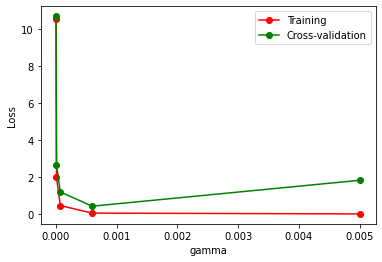

In [9]:
#交叉验证_3

from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits=load_digits()
x=digits.data
y=digits.target

param_range=np.logspace(-6,-2.3,5)
train_loss,test_loss=validation_curve(SVC(gamma=0.001),x,y,param_name='gamma',param_range=param_range,cv=10,scoring='neg_mean_squared_error')
train_loss_mean=-np.mean(train_loss,axis=1)
test_loss_mean=-np.mean(test_loss,axis=1)

plt.plot(param_range,train_loss_mean,'o-',color="r",label="Training")
plt.plot(param_range,test_loss_mean,'o-',color="g",label="Cross-validation")
plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

In [10]:
#save step1

from sklearn import svm
from sklearn import datasets

clf=svm.SVC()
iris=datasets.load_iris()
x,y=iris.data,iris.target
clf.fit(x,y)

#method_1 : pickle
import pickle
with open('E:/python/clf.pickle','wb') as f:
    pickle.dump(clf,f)


In [11]:
#save step2

from sklearn import datasets

iris=datasets.load_iris()
x,y=iris.data,iris.target

import pickle
with open('E:/python/clf.pickle','rb') as f:
    clf2=pickle.load(f)
    print(clf2.predict(x[0:1]))
    print(y[0:1])

[0]
[0]


In [13]:
import joblib
from sklearn import svm
from sklearn import datasets

clf=svm.SVC()
iris=datasets.load_iris()
x,y=iris.data,iris.target
clf.fit(x,y)

joblib.dump(clf,'E:/python/clf.pkl')
clf3=joblib.load('E:/python/clf.pkl')
print(clf3.predict(x[0:1]))
print(y[0:1])

[0]
[0]
